# Paju

In [1]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb
from MLP.utils import combineArray, multiArraySort, data_loader_from_csv, data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Spring: Distance - Pathloss

In [74]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_paju_sp_400.csv', 400, 'dist')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_paju_sp_1399.csv', 1399,'dist')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_paju_sp_2249.csv', 2249,'dist')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Covariance Matrix
            dist      ploss   height
dist     7.06509   25.43698  0.02401
ploss   25.43698  218.27315  0.23351
height   0.02401    0.23351  0.00267
--------------------------------------------------
Preprocessing <data/PLdata_paju_sp_400.csv>...Total 90557
- moving type: total: 46200 (training: 36960/validation: 9240)
- stationary type: total: 44357 (training: 35485/validation: 8872)
Covariance Matrix
            dist      ploss   height
dist     7.04999   22.98235  0.02395
ploss   22.98235  167.77716  0.16953
height   0.02395    0.16953  0.00267
--------------------------------------------------
Preprocessing <data/PLdata_paju_sp_1399.csv>...Total 90501
- moving type: total: 46144 (training: 36915/validation: 9229)
- stationary type: total: 44357 (training: 35485/validation: 8872)
Covariance Matrix
            dist      ploss   height
dist     7.03023   18.13755  0.02387
ploss   18.13755  114.39710  0.12701
height   0.02387    0.12701  0.00267
-----------------------

# Summer: Distance - Pathloss

In [39]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_paju_sm_400.csv', 400, 'dist')
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_paju_sm_1399.csv', 1399,'dist')
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_paju_sm_2249.csv', 2249,'dist')

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

Preprocessing <data/PLdata_paju_sm_400.csv>...Total 109969
- moving type: total: 84915 (training: 67932/validation: 16983)
- stationary type: total: 25054 (training: 20043/validation: 5011)
Preprocessing <data/PLdata_paju_sm_1399.csv>...Total 109891
- moving type: total: 84837 (training: 67869/validation: 16968)
- stationary type: total: 25054 (training: 20043/validation: 5011)
Preprocessing <data/PLdata_paju_sm_2249.csv>...Total 109754
- moving type: total: 84700 (training: 67760/validation: 16940)
- stationary type: total: 25054 (training: 20043/validation: 5011)


# Winter: Distance-Pathloss

In [2]:
%autoreload
X_train_m_400, X_val_m_400, y_train_m_400, y_val_m_400, X_train_s_400, X_val_s_400, y_train_s_400, y_val_s_400 = data_loader_from_csv('data/PLdata_paju_wt_400.csv', np.log10(400), 'dist', 4)
X_train_m_1399, X_val_m_1399, y_train_m_1399, y_val_m_1399, X_train_s_1399, X_val_s_1399, y_train_s_1399, y_val_s_1399 = data_loader_from_csv('data/PLdata_paju_wt_1399.csv', np.log10(1399),'dist', 4)
X_train_m_2249, X_val_m_2249, y_train_m_2249, y_val_m_2249, X_train_s_2249, X_val_s_2249, y_train_s_2249, y_val_s_2249 = data_loader_from_csv('data/PLdata_paju_wt_2249.csv', np.log10(2249),'dist', 4)

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_val_m = combineArray(X_val_m_400, X_val_m_1399, X_val_m_2249)
y_val_m = combineArray(y_val_m_400, y_val_m_1399, y_val_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_val_s = combineArray(X_val_s_400, X_val_s_1399, X_val_s_2249)
y_val_s = combineArray(y_val_s_400, y_val_s_1399, y_val_s_2249)

dataX_m = list()
dataY_m = list()
dataX_m.append(X_train_m_400)
dataY_m.append(y_train_m_400)
dataX_m.append(X_train_m_1399)
dataY_m.append(y_train_m_1399)
dataX_m.append(X_train_m_2249)
dataY_m.append(y_train_m_2249)

original: 110440
filtered: 24251
Covariance Matrix
           dist      ploss   height
dist    0.87491    4.63464  0.00173
ploss   4.63464  147.96141  0.00553
height  0.00173    0.00553  0.00213
--------------------------------------------------
Preprocessing <data/PLdata_paju_wt_400.csv>...Total 24251
- moving type: total: 18536 (training: 14828/validation: 3708)
- stationary type: total: 5715 (training: 4572/validation: 1143)
original: 110358
filtered: 24209
Covariance Matrix
           dist      ploss   height
dist    0.87318    4.63990  0.00176
ploss   4.63990  184.48977 -0.00469
height  0.00176   -0.00469  0.00213
--------------------------------------------------
Preprocessing <data/PLdata_paju_wt_1399.csv>...Total 24209
- moving type: total: 18494 (training: 14795/validation: 3699)
- stationary type: total: 5715 (training: 4572/validation: 1143)
original: 110246
filtered: 24151
Covariance Matrix
           dist      ploss   height
dist    0.87039    4.67475  0.00176
ploss   4.67

<Paju - Winter> Relu (dist<=4000m)
dist:(300, 300)
freq:(300, 300)
X_all:(90000, 2)


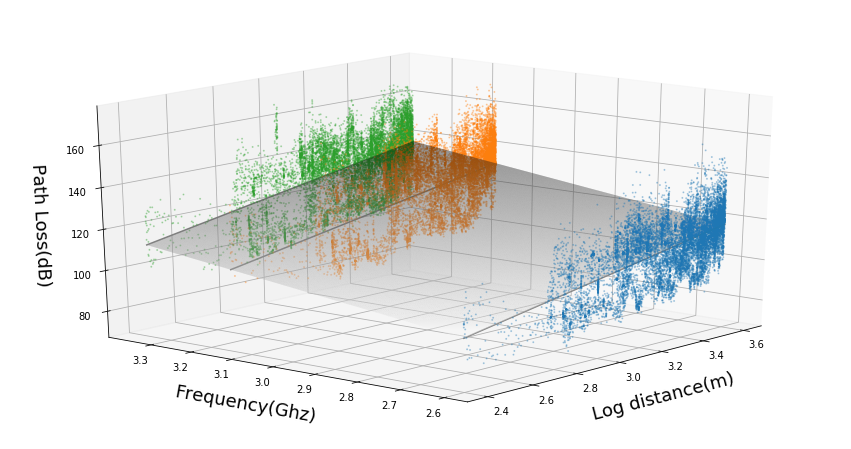

72.53793885062971
140
7
1


TEST ERROR(dB),RMSE,MAE,MAPE,MSLE,R2
0.4Ghz,10.81929,8.86765,7.96196,0.00937,-5.20631
1.399Ghz,13.04313,11.05639,8.80351,0.01047,-7.71734
2.249Ghz,12.35097,9.94831,7.58856,0.00935,-7.34067
Overall,12.10561,9.95657,8.11841,0.00973,-0.66170


In [3]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60, 60, 60, 60, 60), 'relu', 'lbfgs')

print("<Paju - Winter> Relu (dist<=4000m)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
y_pred_400 = model.predict(X_val_m_400)
y_pred_1399 = model.predict(X_val_m_1399)
y_pred_2249 = model.predict(X_val_m_2249)
y_pred = model.predict(X_val_m)
stat = np.array([mlp_prediction_error(model,X_val_m_400, y_val_m_400),mean_absolute_error(y_pred_400, y_val_m_400),mean_absolute_percentage_error(y_pred_400, y_val_m_400),mean_squared_log_error(y_pred_400, y_val_m_400),r2_score(y_pred_400, y_val_m_400),
                 mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),mean_absolute_error(y_pred_1399, y_val_m_1399),mean_absolute_percentage_error(y_pred_1399, y_val_m_1399),mean_squared_log_error(y_pred_1399, y_val_m_1399),r2_score(y_pred_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),mean_absolute_error(y_pred_2249, y_val_m_2249),mean_absolute_percentage_error(y_pred_2249, y_val_m_2249),mean_squared_log_error(y_pred_2249, y_val_m_2249),r2_score(y_pred_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_val_m, y_val_m), mean_absolute_error(y_pred, y_val_m),mean_absolute_percentage_error(y_pred, y_val_m),mean_squared_log_error(y_pred, y_val_m),r2_score(y_pred, y_val_m)])

(pd.DataFrame(stat.reshape((4,5)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['RMSE','MAE','MAPE','MSLE','R2'],name='TEST ERROR(dB)')))

<Paju - Winter> Logistic Sigmoid (dist<=4000m)
dist:(300, 300)
freq:(300, 300)
X_all:(90000, 2)


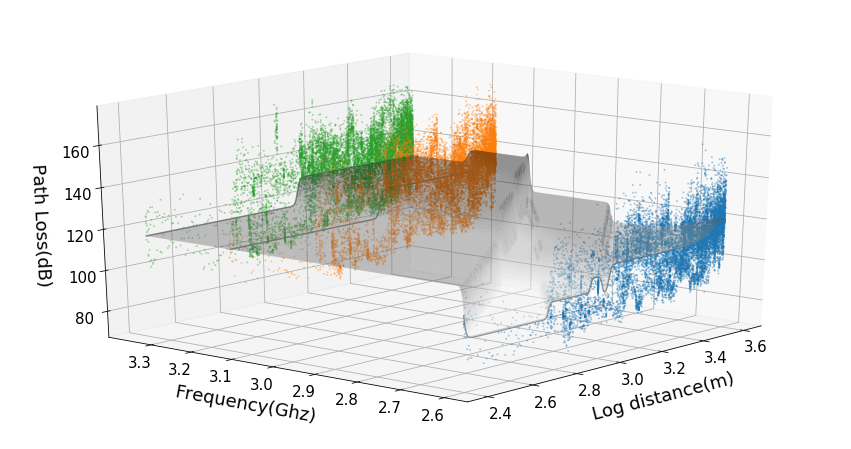

69.42477521972425
1165
3
1


TEST ERROR(dB),RMSE,MAE,MAPE,MSLE,R2
0.4Ghz,10.52553,8.42566,7.59036,0.00883,-3.49262
1.399Ghz,12.56747,10.43047,8.09733,0.00996,-4.19430
2.249Ghz,12.41235,9.91142,7.73980,0.00915,-7.68817
Overall,11.86988,9.58792,7.80906,0.00932,-0.50117


In [4]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60), 'logistic', 'lbfgs')

print("<Paju - Winter> Logistic Sigmoid (dist<=4000m)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
y_pred_400 = model.predict(X_val_m_400)
y_pred_1399 = model.predict(X_val_m_1399)
y_pred_2249 = model.predict(X_val_m_2249)
y_pred = model.predict(X_val_m)
stat = np.array([mlp_prediction_error(model,X_val_m_400, y_val_m_400),mean_absolute_error(y_pred_400, y_val_m_400),mean_absolute_percentage_error(y_pred_400, y_val_m_400),mean_squared_log_error(y_pred_400, y_val_m_400),r2_score(y_pred_400, y_val_m_400),
                 mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),mean_absolute_error(y_pred_1399, y_val_m_1399),mean_absolute_percentage_error(y_pred_1399, y_val_m_1399),mean_squared_log_error(y_pred_1399, y_val_m_1399),r2_score(y_pred_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),mean_absolute_error(y_pred_2249, y_val_m_2249),mean_absolute_percentage_error(y_pred_2249, y_val_m_2249),mean_squared_log_error(y_pred_2249, y_val_m_2249),r2_score(y_pred_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_val_m, y_val_m), mean_absolute_error(y_pred, y_val_m),mean_absolute_percentage_error(y_pred, y_val_m),mean_squared_log_error(y_pred, y_val_m),r2_score(y_pred, y_val_m)])

(pd.DataFrame(stat.reshape((4,5)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['RMSE','MAE','MAPE','MSLE','R2'],name='TEST ERROR(dB)')))

<Paju - Winter> Tangent Hyperbolic (dist<=4000m)
dist:(300, 300)
freq:(300, 300)
X_all:(90000, 2)


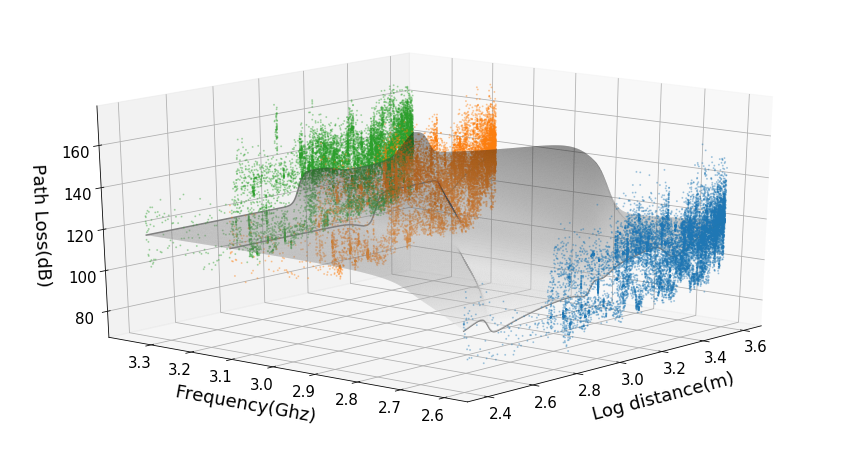

65.1527858878567
2001
3
1


TEST ERROR(dB),RMSE,MAE,MAPE,MSLE,R2
0.4Ghz,10.47012,8.17271,7.34394,0.00877,-3.30144
1.399Ghz,12.13168,9.85896,7.75772,0.00919,-2.99919
2.249Ghz,11.80339,9.23460,7.13341,0.00843,-3.16340
Overall,11.48978,9.08787,7.41191,0.00880,-0.29232


In [5]:
%autoreload
model = None
model = mlp_regression(X_train_m, y_train_m, (60), 'tanh', 'lbfgs')

print("<Paju - Winter> Tangent Hyperbolic (dist<=4000m)")
mlp_train_multi_3dgraph_comb(model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

print(model.loss_)
print(model.n_iter_ )
print(model.n_layers_)
print(model.n_outputs_)
y_pred_400 = model.predict(X_val_m_400)
y_pred_1399 = model.predict(X_val_m_1399)
y_pred_2249 = model.predict(X_val_m_2249)
y_pred = model.predict(X_val_m)
stat = np.array([mlp_prediction_error(model,X_val_m_400, y_val_m_400),mean_absolute_error(y_pred_400, y_val_m_400),mean_absolute_percentage_error(y_pred_400, y_val_m_400),mean_squared_log_error(y_pred_400, y_val_m_400),r2_score(y_pred_400, y_val_m_400),
                 mlp_prediction_error(model,X_val_m_1399, y_val_m_1399),mean_absolute_error(y_pred_1399, y_val_m_1399),mean_absolute_percentage_error(y_pred_1399, y_val_m_1399),mean_squared_log_error(y_pred_1399, y_val_m_1399),r2_score(y_pred_1399, y_val_m_1399),
                 mlp_prediction_error(model,X_val_m_2249, y_val_m_2249),mean_absolute_error(y_pred_2249, y_val_m_2249),mean_absolute_percentage_error(y_pred_2249, y_val_m_2249),mean_squared_log_error(y_pred_2249, y_val_m_2249),r2_score(y_pred_2249, y_val_m_2249),
                 mlp_prediction_error(model,X_val_m, y_val_m), mean_absolute_error(y_pred, y_val_m),mean_absolute_percentage_error(y_pred, y_val_m),mean_squared_log_error(y_pred, y_val_m),r2_score(y_pred, y_val_m)])

(pd.DataFrame(stat.reshape((4,5)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['RMSE','MAE','MAPE','MSLE','R2'],name='TEST ERROR(dB)')))